In [1]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]

In [4]:
data_folder = r"E:\data\gst-0815-23\N12E16\Sharing"
# GG
gg_performance_file = data_folder + r"\gg_performance_across_K"
gg_cog_performance_file = data_folder + r"\gg_cog_performance_across_K_time"
gg_variance_file = data_folder + r"\gg_variance_across_K"
gg_performance_time_file = data_folder + r"\gg_performance_across_K_time"
# GS
gs_performance_file = data_folder + r"\gs_performance_across_K"
gs_cog_performance_file = data_folder + r"\gs_cog_performance_across_K_time"
gs_variance_file = data_folder + r"\gs_variance_across_K"
gs_performance_time_file = data_folder + r"\gs_performance_across_K_time"
# SS
ss_performance_file = data_folder + r"\ss_performance_across_K"

ss_cog_performance_file = data_folder + r"\ss_cog_performance_across_K_time"
ss_variance_file = data_folder + r"\ss_variance_across_K"
ss_performance_time_file = data_folder + r"\ss_performance_across_K_time"
# SG
sg_performance_file = data_folder + r"\sg_performance_across_K"
sg_cog_performance_file = data_folder + r"\sg_cog_performance_across_K_time"
sg_variance_file = data_folder + r"\sg_variance_across_K"
sg_performance_time_file = data_folder + r"\sg_performance_across_K_time"

# GG
with open(gg_performance_file, 'rb') as infile:
    gg_fitness = pickle.load(infile)
with open(gg_cog_performance_file, 'rb') as infile:
    gg_cog_fitness = pickle.load(infile)
with open(gg_variance_file, 'rb') as infile:
    gg_variance = pickle.load(infile)
with open(gg_performance_time_file, 'rb') as infile:
    gg_performance_time = pickle.load(infile)
# GS
with open(gs_performance_file, 'rb') as infile:
    gs_fitness = pickle.load(infile)
with open(gs_cog_performance_file, 'rb') as infile:
    gs_cog_fitness = pickle.load(infile)
with open(gs_variance_file, 'rb') as infile:
    gs_variance = pickle.load(infile)
with open(gs_performance_time_file, 'rb') as infile:
    gs_performance_time = pickle.load(infile)
# SS
with open(ss_performance_file, 'rb') as infile:
    ss_fitness = pickle.load(infile)
with open(ss_cog_performance_file, 'rb') as infile:
    ss_cog_fitness = pickle.load(infile)
with open(ss_variance_file, 'rb') as infile:
    ss_variance = pickle.load(infile)
with open(ss_performance_time_file, 'rb') as infile:
    ss_performance_time = pickle.load(infile)
# SG
with open(sg_performance_file, 'rb') as infile:
    sg_fitness = pickle.load(infile)
with open(sg_cog_performance_file, 'rb') as infile:
    sg_cog_fitness = pickle.load(infile)
with open(sg_variance_file, 'rb') as infile:
    sg_variance = pickle.load(infile)
with open(sg_performance_time_file, 'rb') as infile:
    sg_performance_time = pickle.load(infile)



In [7]:
# Baseline: independent search
baseline_folder = r"E:\data\gst-0815-23\N12E16\Baseline_2"
g_performance_file = baseline_folder + r"\g_performance_across_K"
s_performance_file = baseline_folder + r"\s_performance_across_K"

g_variance_file = baseline_folder + r"\g_variance_across_K"
s_variance_file = baseline_folder + r"\s_variance_across_K"

with open(g_performance_file, 'rb') as infile:
    g_fitness = pickle.load(infile)
with open(s_performance_file, 'rb') as infile:
    s_fitness = pickle.load(infile)

with open(g_variance_file, 'rb') as infile:
    g_variance = pickle.load(infile)
with open(s_variance_file, 'rb') as infile:
    s_variance = pickle.load(infile)

print(np.array(g_fitness).shape)
print(g_fitness)

(12,)
[0.7115317908949165, 0.6850020483931165, 0.6695138482363234, 0.661602528403295, 0.6580250292107543, 0.6554919694065694, 0.6519444710282971, 0.6472867516028274, 0.6416841269416587, 0.6388990013208072, 0.6340716860356039, 0.6286080828183913]


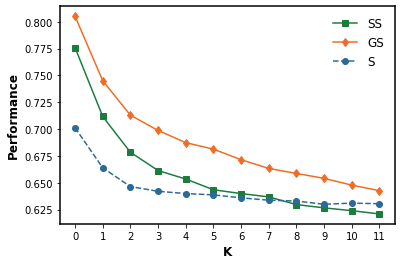

In [10]:
# S Fitness
x = range(len(gs_fitness))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, ss_fitness, "s-", label="SS", color=nature_green)
plt.plot(x, gs_fitness, "d-", label="GS", color=nature_orange)
plt.plot(x, s_fitness, "o--", label="S", color=nature_blue)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\S_performance_colored.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

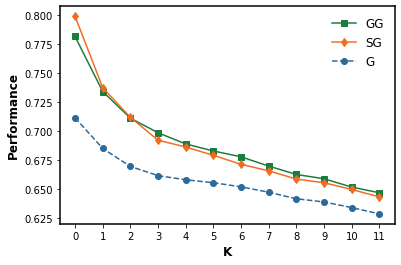

In [12]:
# G Fitness
x = range(len(gs_fitness))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, gg_fitness, "s-", label="GG", color=nature_green)
plt.plot(x, sg_fitness, "d-", label="SG", color=nature_orange)
plt.plot(x, g_fitness, "o--", label="G", color=nature_blue)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\G_performance_colored.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

<ipython-input-9-e955180bf6d4>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, gg_variance, "k-", label="GG", color=nature_orange)
<ipython-input-9-e955180bf6d4>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, sg_variance, "k-", label="SG", color=nature_green)
<ipython-input-9-e955180bf6d4>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, g_variance, "k-", label="G", color=nature_blue)


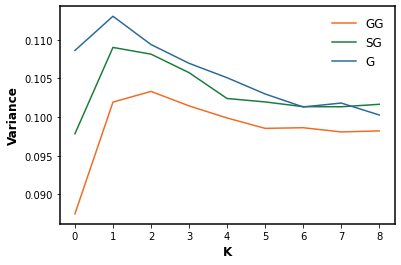

In [9]:
# GST Variance
x = range(len(g_variance))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, gg_variance, "k-", label="GG", color=nature_orange)
plt.plot(x, sg_variance, "k-", label="SG", color=nature_green)
plt.plot(x, g_variance, "k-", label="G", color=nature_blue)
# plt.plot(x, t_variance, "k-", label="T", color=nature_orange)

plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Variance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\G_variance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

<ipython-input-10-5e5da7edcebf>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, gg_performance_time[0], "k-", label="K=0", color=morandi_green)
<ipython-input-10-5e5da7edcebf>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, gg_performance_time[1], "k-", label="K=1", color=morandi_orange)
<ipython-input-10-5e5da7edcebf>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, gg_performance_time[2], "k-", label="K=2", color=morandi_red)
<ipython-input-10-5e5da7edcebf>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedenc

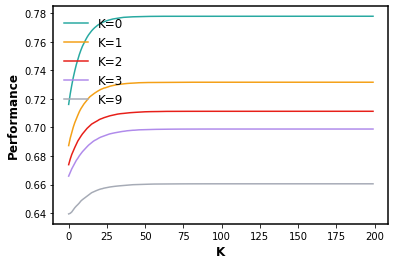

In [10]:
# Assess the time dimension
x = range(len(gg_performance_time[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, gg_performance_time[0], "k-", label="K=0", color=morandi_green)
plt.plot(x, gg_performance_time[1], "k-", label="K=1", color=morandi_orange)
plt.plot(x, gg_performance_time[2], "k-", label="K=2", color=morandi_red)
plt.plot(x, gg_performance_time[3], "k-", label="K=3", color=morandi_purple)
plt.plot(x, gg_performance_time[-1], "k-", label="K=9", color=deep_grey)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\GG_performance_time.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

<ipython-input-11-f6b39d0c2776>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, sg_performance_time[0], "k-", label="K=0", color=morandi_green)
<ipython-input-11-f6b39d0c2776>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, sg_performance_time[1], "k-", label="K=1", color=morandi_orange)
<ipython-input-11-f6b39d0c2776>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, sg_performance_time[2], "k-", label="K=2", color=morandi_red)
<ipython-input-11-f6b39d0c2776>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedenc

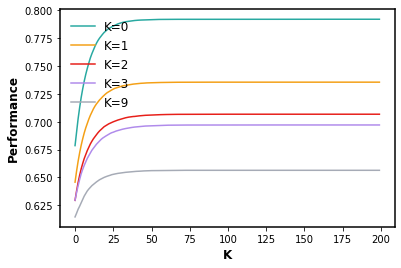

In [11]:
# Assess the time dimension
x = range(len(sg_performance_time[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, sg_performance_time[0], "k-", label="K=0", color=morandi_green)
plt.plot(x, sg_performance_time[1], "k-", label="K=1", color=morandi_orange)
plt.plot(x, sg_performance_time[2], "k-", label="K=2", color=morandi_red)
plt.plot(x, sg_performance_time[3], "k-", label="K=3", color=morandi_purple)
plt.plot(x, sg_performance_time[-1], "k-", label="K=9", color=deep_grey)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\SG_performance_time.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

<ipython-input-12-5834d00c62b7>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, gs_performance_time[0], "k-", label="K=0", color=morandi_green)
<ipython-input-12-5834d00c62b7>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, gs_performance_time[1], "k-", label="K=1", color=morandi_orange)
<ipython-input-12-5834d00c62b7>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, gs_performance_time[2], "k-", label="K=2", color=morandi_red)
<ipython-input-12-5834d00c62b7>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedenc

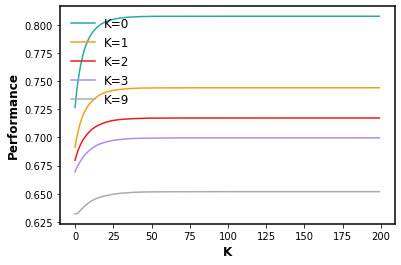

In [12]:
# Assess the time dimension
x = range(len(gs_performance_time[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, gs_performance_time[0], "k-", label="K=0", color=morandi_green)
plt.plot(x, gs_performance_time[1], "k-", label="K=1", color=morandi_orange)
plt.plot(x, gs_performance_time[2], "k-", label="K=2", color=morandi_red)
plt.plot(x, gs_performance_time[3], "k-", label="K=3", color=morandi_purple)
plt.plot(x, gs_performance_time[-1], "k-", label="K=9", color=deep_grey)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\GS_performance_time.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

<ipython-input-13-bd01adfa2fea>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, ss_performance_time[0], "k-", label="K=0", color=morandi_green)
<ipython-input-13-bd01adfa2fea>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, ss_performance_time[1], "k-", label="K=1", color=morandi_orange)
<ipython-input-13-bd01adfa2fea>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, ss_performance_time[2], "k-", label="K=2", color=morandi_red)
<ipython-input-13-bd01adfa2fea>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedenc

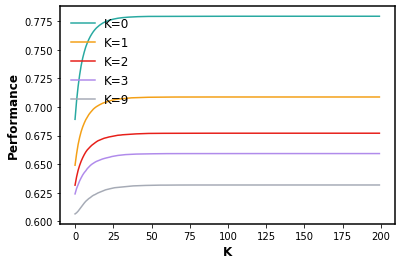

In [13]:
# Assess the time dimension
x = range(len(ss_performance_time[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, ss_performance_time[0], "k-", label="K=0", color=morandi_green)
plt.plot(x, ss_performance_time[1], "k-", label="K=1", color=morandi_orange)
plt.plot(x, ss_performance_time[2], "k-", label="K=2", color=morandi_red)
plt.plot(x, ss_performance_time[3], "k-", label="K=3", color=morandi_purple)
plt.plot(x, ss_performance_time[-1], "k-", label="K=9", color=deep_grey)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\SS_performance_time.png", transparent=True, dpi=300)
plt.show()
# plt.clf()